# Project: LeNet Convolutional Network MNIST


## Introduction
In this notebook, we aim to implement one of the most famous and original covolutional networks called the "LeNet", first proposed by Yann LeCun et al. in 1998. The implemented will be closer to the original model. We will then use the model to perform handwritten digit recognition using the MNIST dataset. We will use the PyTorch framework to build and train the model. In a separate notebook, we will also implement a multi-layer perceptron (MLP) model to perform the same task and then compare LeNet's performance against the MLP's both in their accuracy and robustness, as well as their translation invariance properties.

We will begin by importing the necessary packages and frameworks.

## Import Libraries and Packages

In [1]:
import numpy as np           
import matplotlib.pyplot as plt    
import pandas as pd
import torch          
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.functional as F

## Import Dataset and Preprocessing

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load the training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

dataiter = iter(trainloader)
images, labels = next(dataiter)
images_np = images.numpy()
labels_np = labels.numpy()

print(f'Batch shape: {images_np.shape}')  
print(f'Batch label shape: {labels_np.shape}')  

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12668117.82it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 334602.18it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3112263.48it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2500069.39it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Batch shape: (64, 1, 28, 28)
Batch label shape: (64,)


## LeNet Architecture

In [5]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Average Pooling Layers
        self.pool1 = nn.AvgPool2d(2, stride=2)
        self.pool2 = nn.AvgPool2d(2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        # Sigmoid as fully connected layer activation
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        # Forward prop
        
        # Layer 1 (conv + pool)
        x = self.conv1(x)
        x = self.pool1(x)
        
        # Layer 2 (conv + pool)
        x = self.conv2(x)
        x = self.pool2(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Fully Dense Layers
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        
        return x

In [6]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Initialize model
model = LeNet()
print(model)

# Move the model to the device of choice
model = model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


Using device: cuda
LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (activation): Sigmoid()
)


## Model Training

In [7]:
log = []
for epoch in range(10):
    running_loss = 0
    
    for i, data in enumerate(trainloader, 0):
        # Input the training batch
        inputs, labels = data
        
        # Move data to the preferred device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Reset the parameter gradients
        optimizer.zero_grad()
        
        # Forward prop
        outputs = model(inputs)
        
        # Loss
        loss = criterion(outputs, labels)
        log.append(loss.item()) 
        
        # Back prop
        loss.backward()
        optimizer.step()
        
        # Accumulate running loss
        running_loss += loss.item()
        
        # Print every 100 mini-batches
        if i % 100 == 99:
            print(f'Epoch [{epoch + 1}], Batch [{i + 1}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print("Training Complete!")

Epoch [1], Batch [200], Loss: 2.3010
Epoch [1], Batch [300], Loss: 2.3013
Epoch [1], Batch [400], Loss: 2.2999
Epoch [1], Batch [500], Loss: 2.3012
Epoch [1], Batch [600], Loss: 2.3004
Epoch [1], Batch [700], Loss: 2.2982
Epoch [1], Batch [800], Loss: 2.2989
Epoch [1], Batch [900], Loss: 2.3009
Epoch [2], Batch [100], Loss: 2.2999
Epoch [2], Batch [200], Loss: 2.2979
Epoch [2], Batch [300], Loss: 2.2981
Epoch [2], Batch [400], Loss: 2.2975
Epoch [2], Batch [500], Loss: 2.2959
Epoch [2], Batch [600], Loss: 2.2956
Epoch [2], Batch [700], Loss: 2.2945
Epoch [2], Batch [800], Loss: 2.2931
Epoch [2], Batch [900], Loss: 2.2928
Epoch [3], Batch [100], Loss: 2.2904
Epoch [3], Batch [200], Loss: 2.2883
Epoch [3], Batch [300], Loss: 2.2861
Epoch [3], Batch [400], Loss: 2.2823
Epoch [3], Batch [500], Loss: 2.2783
Epoch [3], Batch [600], Loss: 2.2731
Epoch [3], Batch [700], Loss: 2.2666
Epoch [3], Batch [800], Loss: 2.2575
Epoch [3], Batch [900], Loss: 2.2426
Epoch [4], Batch [100], Loss: 2.2167
E

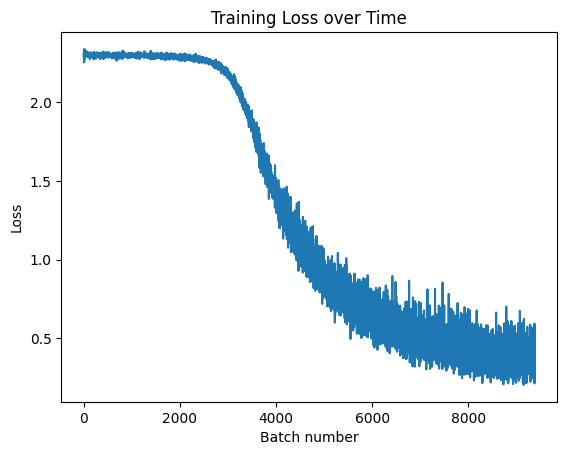

In [8]:
plt.plot(log)
plt.xlabel('Batch number')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.show()

## Evaluation

In [9]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for i, data in enumerate(dataloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            values, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total
    return avg_loss, accuracy

# Evaluate on training data
train_loss, train_accuracy = evaluate(model, trainloader, criterion, device)
print(f'Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}')

# Evaluate on test data
test_loss, test_accuracy = evaluate(model, testloader, criterion, device)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

Training Accuracy: 0.9090, Training Loss: 0.3589
Test Accuracy: 0.9121, Test Loss: 0.3529


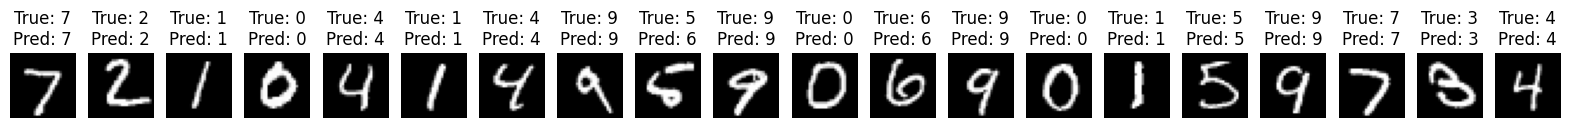

In [10]:
def visualize_predictions(model, testloader, device, num_images=20):
    model.eval()
    
    images, labels = next(iter(testloader))  # Get a batch of test images
    images, labels = images.to(device), labels.to(device)
    
    # Get predictions
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    
    # Move images and labels back to CPU for visualization
    images = images.cpu().numpy()
    labels = labels.cpu().numpy()
    predicted = predicted.cpu().numpy()
    
    # Visualize the images with true and predicted labels
    fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'True: {labels[i]}\nPred: {predicted[i]}')
        ax.axis('off')
    plt.show()

# Visualize predictions
visualize_predictions(model, testloader, device)